In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
from analytics_labels import *
from analytics_functions import clean_activations


ACTS = [ACT0, ACT1, ACT2]


In [3]:
def get_thr(act):
    return {ACT0: THR_ACT0, ACT1: THR_ACT1, ACT2: THR_ACT2}[act]

def make_df(data):
    df = pd.DataFrame()

    for d in data:
        df_temp = pd.read_csv(d['file'])

        df_temp = df_temp[df_temp[DIST] < 20]
        df_temp[DIST] = df_temp[DIST].apply(lambda x: - x)
        df_temp[LABEL] = d['label']

        for a in ACTS:
            df_temp[a] = df_temp[a].apply(clean_activations)
            df_temp[a] = df_temp[a].apply(np.median)

        df = df.append(df_temp)
    return df


def show(data, pprint=True, thr=False):
    labels = {ACT0: 'Left', ACT1: 'Centre', ACT2: 'Right'}

    fig, axs = plt.subplots(1, 3, figsize=(20,5))

    for i, act in enumerate(ACTS):                
        axs[i].plot(data[DIST], data[act], label = 'Raw')
        axs[i].set_title(labels[act])

        if thr:
            thr_act = data[get_thr(act)]
            axs[i].plot(data[DIST], thr_act, label='Threshold: '  + str(thr[i]))
            axs[i].legend()
        axs[i].set_xlabel('Distance')
        axs[i].set_ylabel('Activation')

    fig.suptitle('Activations for: ' + data[LABEL].iloc[0])
    plt.show()

    if pprint:
        for a in ACTS:
            print('\n  - ' + a + ':\n')
            print('    - Mean: ' + str(round(np.mean(data[a]), 2)))
            print('    - Median: ' + str(round(np.median(data[a]), 2)))
            print('    - Std: ' + str(round(np.std(data[a]), 2)))
        print('\n')

In [4]:
def add_threshold(df, act, t):
    thr = {ACT0: THR_ACT0, ACT1: THR_ACT1, ACT2: THR_ACT2}[act]
    df[thr] = df[act]
    df[thr] = df[thr].apply(lambda x: x if x >= t else np.nan)
    return df
    

## No obstacle

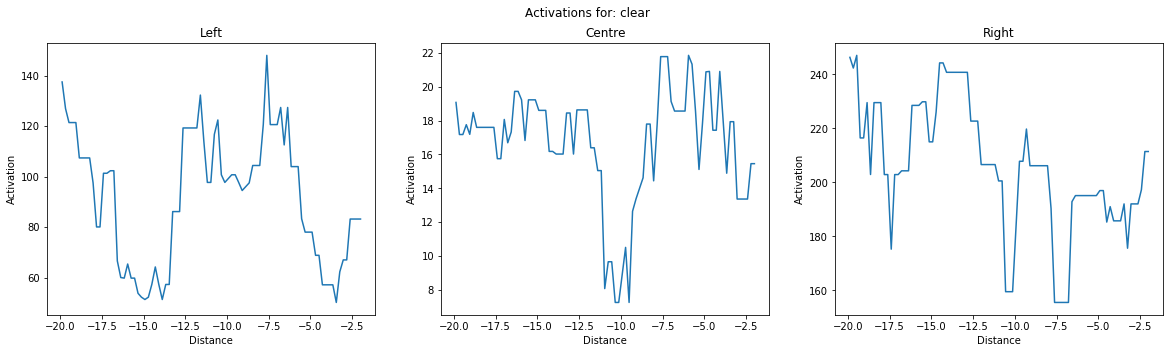


  - activation_0:

    - Mean: 91.32
    - Median: 97.72
    - Std: 25.52

  - activation_1:

    - Mean: 16.8
    - Median: 17.6
    - Std: 3.23

  - activation_2:

    - Mean: 206.24
    - Median: 206.18
    - Std: 23.79




In [12]:

data = [
    {
        'file': 'csv/0-no-obstacle-0.csv',
        'label': 'clear'
    }
]

df = make_df(data)
show(df)



# Testing Thresholds

In [6]:
thrs = [500, 10, 500]

## Central obstacle

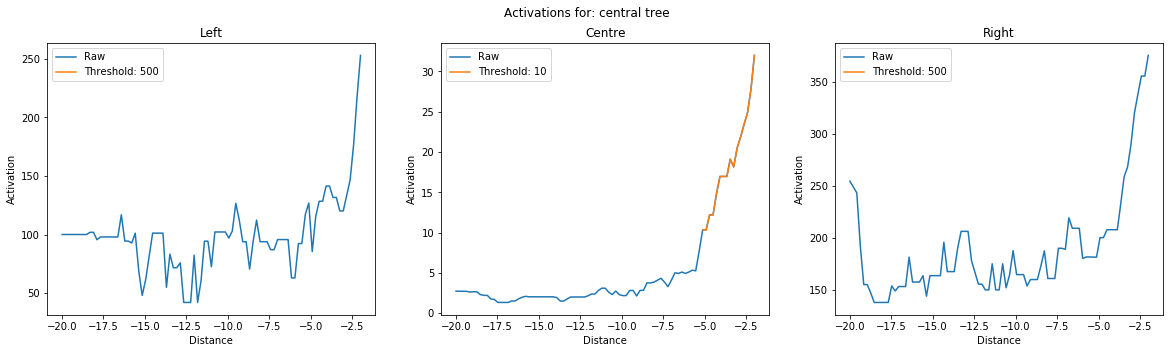


  - activation_0:

    - Mean: 100.52
    - Median: 97.98
    - Std: 31.79

  - activation_1:

    - Mean: 5.81
    - Median: 2.73
    - Std: 6.89

  - activation_2:

    - Mean: 188.86
    - Median: 173.07
    - Std: 51.03




In [50]:
data = [
    # {
    #     'file': 'csv/0-central-obstacle-0.csv',
    #     'label': 'central tree'
    # },
    {
        'file': 'csv/0-central-obstacle-1.csv',
        'label': 'central tree'
    }
]

df = make_df(data)
df = add_threshold(df, ACT0, thrs[0])
df = add_threshold(df, ACT1, thrs[1])
df = add_threshold(df, ACT2, thrs[2])

show(df, thr=thrs)

## Right obstacle only

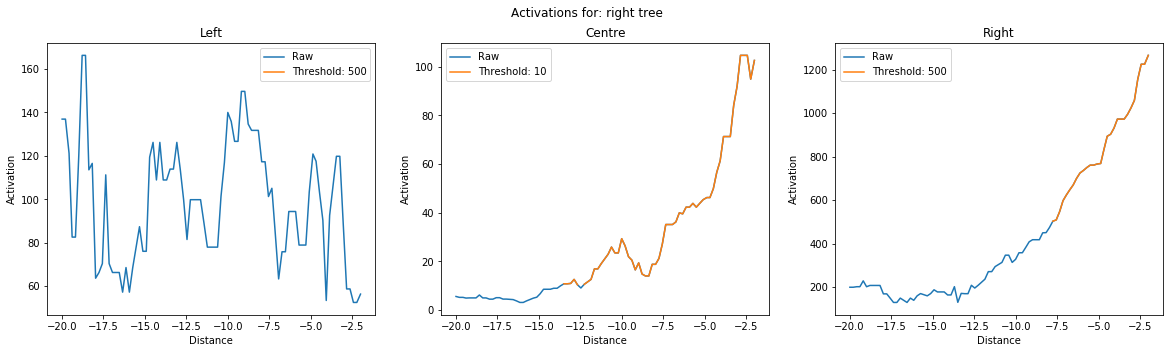


  - activation_0:

    - Mean: 99.38
    - Median: 99.85
    - Std: 27.7

  - activation_1:

    - Mean: 26.66
    - Median: 16.71
    - Std: 27.27

  - activation_2:

    - Mean: 439.15
    - Median: 313.21
    - Std: 319.48




In [51]:
data = [
    {
        'file': 'csv/0-right-obstacle-0.csv',
        'label': 'right tree'
    }
]

df = make_df(data)
df = add_threshold(df, ACT0, thrs[0])
df = add_threshold(df, ACT1, thrs[1])
df = add_threshold(df, ACT2, thrs[2])

show(df, thr=thrs)

## Left obstacle only

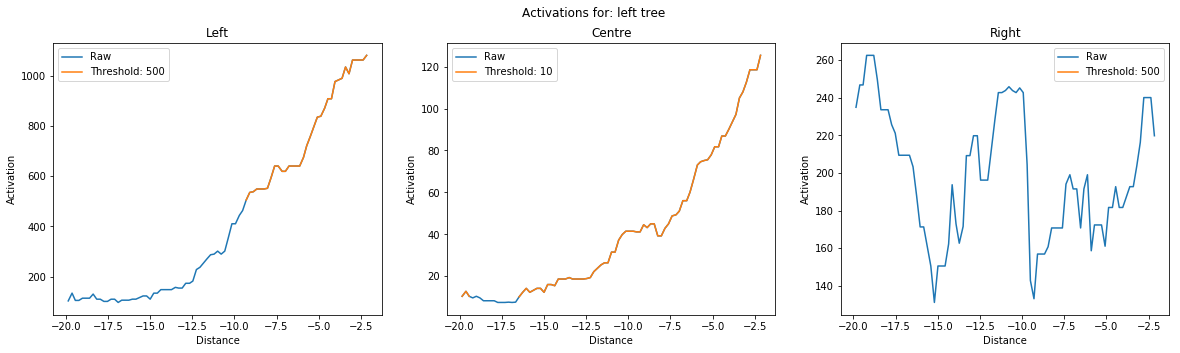


  - activation_0:

    - Mean: 416.51
    - Median: 289.66
    - Std: 317.82

  - activation_1:

    - Mean: 39.95
    - Median: 31.51
    - Std: 32.14

  - activation_2:

    - Mean: 198.8
    - Median: 196.24
    - Std: 33.81




In [52]:
data = [
    {
        'file': 'csv/0-left-obstacle-0.csv',
        'label': 'left tree'
    }
]

df = make_df(data)
df = add_threshold(df, ACT0, thrs[0])
df = add_threshold(df, ACT1, thrs[1])
df = add_threshold(df, ACT2, thrs[2])

show(df, thr=thrs)

## Left and central obstacle

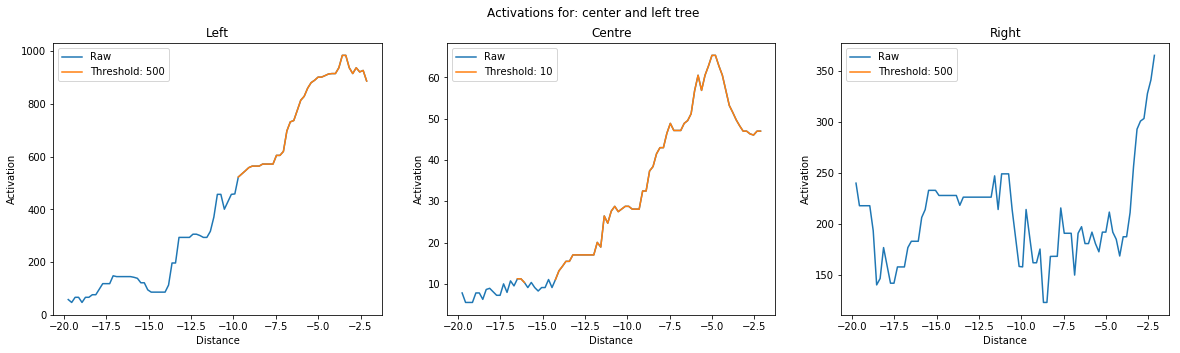


  - activation_0:

    - Mean: 446.31
    - Median: 385.92
    - Std: 320.67

  - activation_1:

    - Mean: 29.12
    - Median: 26.96
    - Std: 19.19

  - activation_2:

    - Mean: 206.37
    - Median: 208.69
    - Std: 44.99




In [53]:
data = [
    {
        'file': 'csv/0-left-central-obstacle-0.csv',
        'label': 'center and left tree'
    }
]

df = make_df(data)
df = add_threshold(df, ACT0, thrs[0])
df = add_threshold(df, ACT1, thrs[1])
df = add_threshold(df, ACT2, thrs[2])

show(df, thr=thrs)

## Right and central obstacle

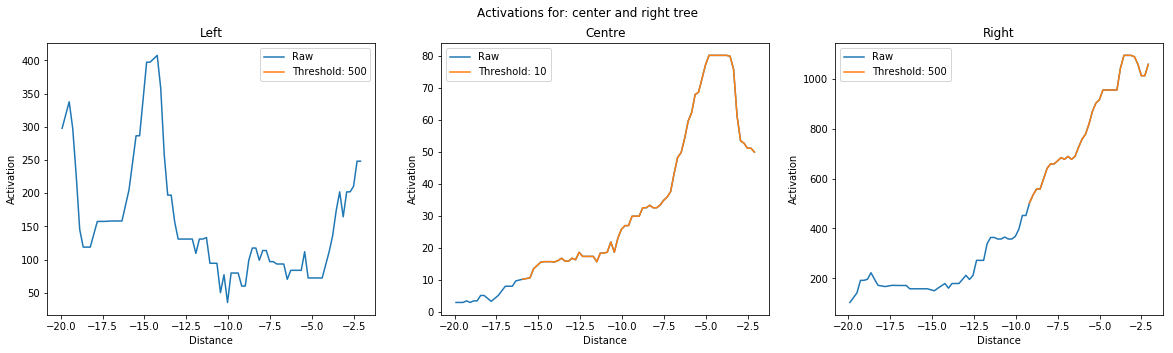


  - activation_0:

    - Mean: 152.17
    - Median: 131.07
    - Std: 86.17

  - activation_1:

    - Mean: 31.4
    - Median: 23.06
    - Std: 23.46

  - activation_2:

    - Mean: 494.27
    - Median: 365.85
    - Std: 320.7




In [54]:
data = [
    {
        'file': 'csv/0-right-central-obstacle-0.csv',
        'label': 'center and right tree'
    }
]

df = make_df(data)
df = add_threshold(df, ACT0, thrs[0])
df = add_threshold(df, ACT1, thrs[1])
df = add_threshold(df, ACT2, thrs[2])

show(df, thr=thrs)

## Conclusions

Promising, however:

- the central activation seems lower when the obstacle is directly in front of the camera
- the central activation is higher for a left/right tree than for a left/right tree with a central tree, which seems like a problem

### Next
- Try to instead have 2 filters for each crop with +- 10 degrees of azimuth offset

# Dual matched filters

## Central obstacle

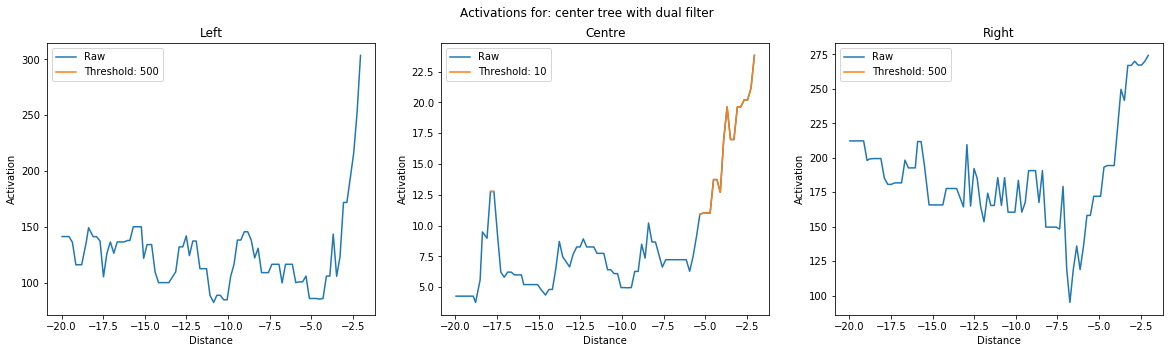


  - activation_0:

    - Mean: 125.84
    - Median: 121.82
    - Std: 34.17

  - activation_1:

    - Mean: 8.73
    - Median: 7.23
    - Std: 4.57

  - activation_2:

    - Mean: 185.58
    - Median: 181.8
    - Std: 35.44




In [58]:
data = [
    {
        'file': 'csv/1-central-obstacle-0.csv',
        'label': 'center tree with dual filter'
    }
]

df = make_df(data)
df = add_threshold(df, ACT0, thrs[0])
df = add_threshold(df, ACT1, thrs[1])
df = add_threshold(df, ACT2, thrs[2])

show(df, thr=thrs)

## Right central obstacle

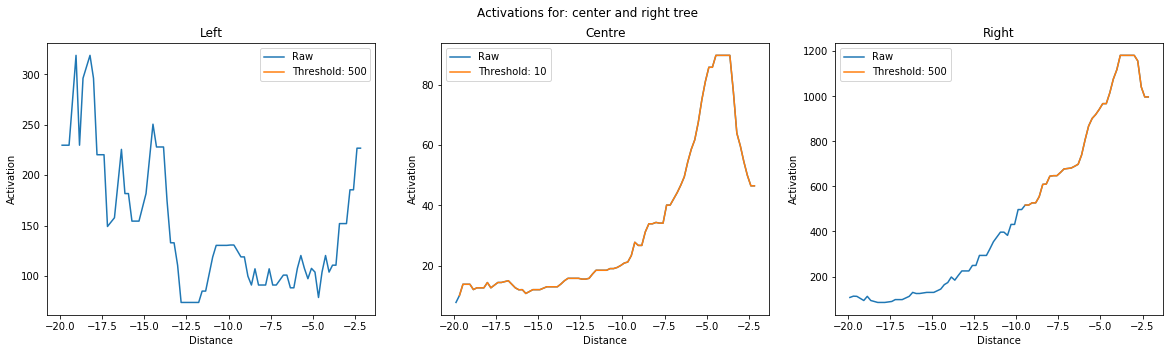


  - activation_0:

    - Mean: 146.39
    - Median: 127.54
    - Std: 63.06

  - activation_1:

    - Mean: 33.58
    - Median: 19.7
    - Std: 25.28

  - activation_2:

    - Mean: 505.09
    - Median: 431.27
    - Std: 363.35




In [59]:
data = [
    {
        'file': 'csv/1-right-central-obstacle-0.csv',
        'label': 'center and right tree with dual filter'
    }
]

df = make_df(data)
df = add_threshold(df, ACT0, thrs[0])
df = add_threshold(df, ACT1, thrs[1])
df = add_threshold(df, ACT2, thrs[2])

show(df, thr=thrs)

## Right obstacle only

In [ ]:
data = [
    {
        'file': 'csv/1-right-obstacle-0.csv',
        'label': 'right tree with dual filter'
    }
]

df = make_df(data)
df = add_threshold(df, ACT0, thrs[0])
df = add_threshold(df, ACT1, thrs[1])
df = add_threshold(df, ACT2, thrs[2])

show(df, thr=thrs)

## Conclusions

Does not seem to improve anything

# Different tree

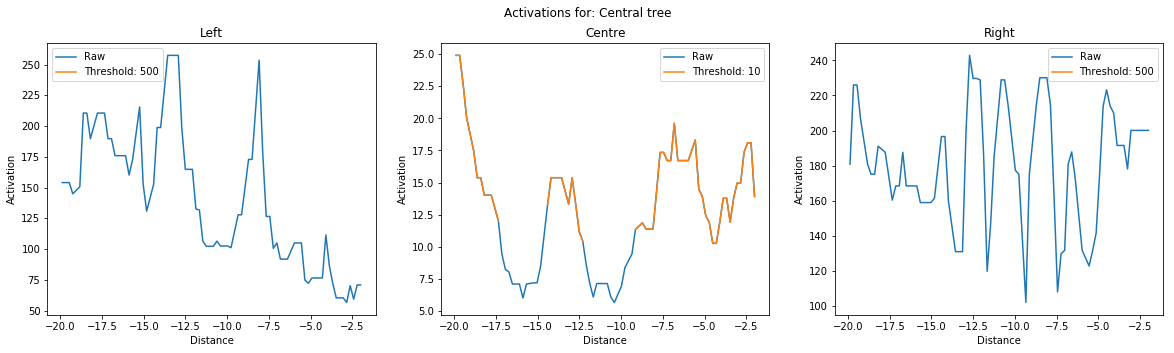


  - activation_0:

    - Mean: 137.16
    - Median: 130.75
    - Std: 54.62

  - activation_1:

    - Mean: 12.84
    - Median: 13.33
    - Std: 4.54

  - activation_2:

    - Mean: 182.26
    - Median: 185.21
    - Std: 32.97




In [7]:
data = [
    {
        'file': 'csv/2-central-obstacle-0.csv',
        'label': 'Central tree'
    }
]

df = make_df(data)
df = add_threshold(df, ACT0, thrs[0])
df = add_threshold(df, ACT1, thrs[1])
df = add_threshold(df, ACT2, thrs[2])

show(df, thr=thrs)